In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import json
import torch
import pandas as pd
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import os
import skimage.io as io
import glob
from ipynb.fs.full.build_dataset_Pytorch import Custom_Dataset
from torch_geometric.data import InMemoryDataset, download_url
from torchtext.utils import extract_archive

In [2]:
builder = Custom_Dataset(os.path.expanduser("~/temp/metadata.json"), os.path.expanduser("~/pytorch_datasets/Biological"), transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()]))

In [3]:
builder.__download_data__()

Make sure the downloaded, compressed file ends with .tar.gz, as otherwise it won't be recognized by the extractor.

In [4]:
builder.__extract_data__(os.path.expanduser("~/pytorch_datasets/Biological/Biological.tar.gz"), os.path.expanduser("~/pytorch_datasets/Biological/extracted"))

The metadata is now accessible in Pandas Dataframe format.

In [5]:
builder.metadata

,profile,resources,contributors,name,title,description,version,licenses
0,data-package,"{'name': 'Biological', 'path': 'https://b2shar...","{'title': 'Aversa, Rossella; Modarres, Mohamma...",data-package-EM,EM_training_data_for_ML,Example of Machine-Learning Training Data with...,1.0.0,{'title': 'Creative Commons Attribution (CC-BY...


Now the dataloader is called, which transfers the dataset into Pytorch format. In this case only a Training set is defined.

In [6]:
builder.__dataloader__(batch_size=10)

In [7]:
builder.dataset[2]

(tensor([[[0.6549, 0.7020, 0.7176,  ..., 0.5961, 0.6000, 0.7255],
          [0.6314, 0.6902, 0.7020,  ..., 0.5098, 0.6549, 0.7020],
          [0.5922, 0.6588, 0.6431,  ..., 0.5333, 0.6196, 0.6667],
          ...,
          [0.6863, 0.6667, 0.6588,  ..., 0.7098, 0.6353, 0.6275],
          [0.6902, 0.6471, 0.6784,  ..., 0.7373, 0.6745, 0.6745],
          [0.7490, 0.6902, 0.6941,  ..., 0.6824, 0.5922, 0.6588]],
 
         [[0.6549, 0.7020, 0.7176,  ..., 0.5961, 0.6000, 0.7255],
          [0.6314, 0.6902, 0.7020,  ..., 0.5098, 0.6549, 0.7020],
          [0.5922, 0.6588, 0.6431,  ..., 0.5333, 0.6196, 0.6667],
          ...,
          [0.6863, 0.6667, 0.6588,  ..., 0.7098, 0.6353, 0.6275],
          [0.6902, 0.6471, 0.6784,  ..., 0.7373, 0.6745, 0.6745],
          [0.7490, 0.6902, 0.6941,  ..., 0.6824, 0.5922, 0.6588]],
 
         [[0.6549, 0.7020, 0.7176,  ..., 0.5961, 0.6000, 0.7255],
          [0.6314, 0.6902, 0.7020,  ..., 0.5098, 0.6549, 0.7020],
          [0.5922, 0.6588, 0.6431,  ...,

In [8]:
training_generator = builder.training_generator

In [9]:
training_generator

Iterate over the dataset content and look at the shape of the dataset elements, as defined in the transformation above.

In [10]:
examples = enumerate(training_generator)
batch_idx, (example_data, example_targets) = next(examples)

In [11]:
example_data[0]

tensor([[[0.4000, 0.4471, 0.4000,  ..., 0.4118, 0.3647, 0.3804],
         [0.3725, 0.4471, 0.4353,  ..., 0.4118, 0.3843, 0.3569],
         [0.4667, 0.5333, 0.5529,  ..., 0.3725, 0.3647, 0.3490],
         ...,
         [0.4549, 0.4745, 0.4784,  ..., 0.2941, 0.3765, 0.4549],
         [0.4627, 0.4980, 0.5059,  ..., 0.3333, 0.3255, 0.3882],
         [0.4392, 0.4471, 0.4392,  ..., 0.3412, 0.3098, 0.3961]],

        [[0.4000, 0.4471, 0.4000,  ..., 0.4118, 0.3647, 0.3804],
         [0.3725, 0.4471, 0.4353,  ..., 0.4118, 0.3843, 0.3569],
         [0.4667, 0.5333, 0.5529,  ..., 0.3725, 0.3647, 0.3490],
         ...,
         [0.4549, 0.4745, 0.4784,  ..., 0.2941, 0.3765, 0.4549],
         [0.4627, 0.4980, 0.5059,  ..., 0.3333, 0.3255, 0.3882],
         [0.4392, 0.4471, 0.4392,  ..., 0.3412, 0.3098, 0.3961]],

        [[0.4000, 0.4471, 0.4000,  ..., 0.4118, 0.3647, 0.3804],
         [0.3725, 0.4471, 0.4353,  ..., 0.4118, 0.3843, 0.3569],
         [0.4667, 0.5333, 0.5529,  ..., 0.3725, 0.3647, 0.

In [12]:
example_data.shape

torch.Size([10, 3, 224, 224])

With __getitem__() a particular element of the dataset can be accessed and visualized.

({'image': array([[[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
  
         [[  0,   0,   0],
          [  0,   0,   0],
          [  1,   1,   1],
          ...,
          [  1,   1,   1],
          [  0,   0,   0],
          [  0,   0,   0]],
  
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  1,   1,   1],
          [  0,   0,   0],
          [  0,   0,   0]],
  
         ...,
  
         [[ 24,  24,  24],
          [ 21,  21,  21],
          [ 26,  26,  26],
          ...,
          [248, 248, 248],
          [251, 251, 251],
          [248, 248, 248]],
  
         [[ 29,  29,  29],
          [ 29,  29,  29],
          [ 21,  21,  21],
          ...,
          [245, 245, 245],
          [250, 250, 250],
          [245, 245, 245]],
  
         [[ 26,  26,  26],
          [ 35,  35,  35],
          [ 20,

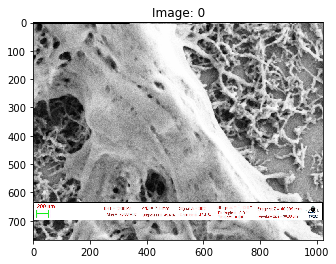

In [13]:
builder.__getitem__(builder.dataset, 0)